

Práctico entregable 2025

Utilizar la base de jugadores “male_players.csv” disponible en la página de Kaggle https://www.kaggle.com/code/nongflook/football-player-performance-prediction?select=male_players.csv . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores  y no tiene exactamente el mismo formato.

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.

2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.

3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

4- Aplicación de clustering para encontrar grupos de jugadores con habilidades equivalentes, por ejemplo, jugadores que podrían intercambiarse en el caso de una lesión o cuando un jugador está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 

5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes los jugadores de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [101]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [102]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import math

In [103]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Pendientes
## 1. Graficar preferred foot por posicion (especificamente linea de ataque)
## 2. Categorizar como: extremos (W y M, R y L) / mediocampistas (centros) / laterales (llb y rb) / defensores (cb) / delanteros (st, cf) / goalkeeper

In [104]:
df = pd.read_csv('../data/male_players.csv')
df.shape

(16161, 58)

In [105]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [106]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Rank,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Balance,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,8080.000000,8080.000000,8934.139657,66.172390,68.149558,54.146835,58.434874,63.599158,50.591981,65.241755,64.778727,64.812264,50.983293,46.680218,58.000990,46.934719,42.579543,47.614813,54.865107,49.554916,42.770621,59.507766,54.207165,48.118743,56.346946,63.664687,64.103088,62.223934,59.039787,58.299672,47.333271,51.868696,47.018873,48.879587,46.635542,66.173442,63.426892,65.317121,56.342986,2.952045,2.393292,25.790545,65.282489,63.281388,62.361784,63.645925,66.120595
std,4665.423186,4665.423186,5003.925857,6.761979,10.612153,13.740389,9.660646,9.262399,16.323879,9.509657,15.478648,15.258747,19.903044,19.912475,12.876878,19.479070,17.707794,15.710242,13.370436,17.922018,16.956133,14.183703,14.424724,18.084827,18.810193,15.097148,14.640849,8.757220,16.712129,12.155230,20.746819,17.371728,20.408949,20.979117,20.509403,11.755204,16.450390,12.370667,16.771384,0.677057,0.783739,4.662681,7.351546,7.019344,7.403049,8.026517,7.775521
min,0.000000,0.000000,1.000000,47.000000,29.000000,20.000000,25.000000,29.000000,15.000000,32.000000,15.000000,15.000000,3.000000,3.000000,20.000000,5.000000,5.000000,10.000000,15.000000,8.000000,6.000000,13.000000,11.000000,7.000000,5.000000,19.000000,20.000000,30.000000,10.000000,15.000000,6.000000,6.000000,5.000000,9.000000,8.000000,27.000000,15.000000,26.000000,11.000000,1.000000,1.000000,17.000000,45.000000,45.000000,44.000000,41.000000,45.000000
25%,4040.000000,4040.000000,5037.000000,62.000000,62.000000,45.000000,52.000000,58.000000,36.000000,59.000000,57.000000,57.000000,40.000000,31.000000,48.000000,32.000000,30.000000,38.000000,46.000000,39.000000,31.000000,55.000000,46.000000,36.000000,51.000000,55.000000,56.000000,57.000000,55.000000,51.000000,27.000000,44.000000,30.000000,29.000000,27.000000,58.000000,57.000000,58.000000,46.000000,3.000000,2.000000,22.000000,60.000000,58.000000,57.000000,58.000000,61.000000
50%,8080.000000,8080.000000,9009.000000,66.000000,69.000000,57.000000,59.000000,64.000000,55.000000,66.000000,68.000000,68.000000,57.000000,51.000000,59.000000,51.000000,44.000000,49.000000,57.000000,54.000000,42.000000,63.000000,57.000000,50.000000,62.000000,66.000000,66.000000,62.000000,63.000000,60.000000,55.000000,55.000000,53.000000,57.000000,54.000000,68.000000,67.000000,66.000000,60.000000,3.000000,2.000000,25.000000,65.000000,63.000000,62.000000,64.000000,66.000000
75%,12120.000000,12120.000000,13135.000000,70.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,75.000000,75.000000,65.000000,63.000000,68.000000,62.000000,56.000000,59.000000,65.000000,63.000000,55.000000,68.000000,64.000000,62.000000,68.000000,75.000000,74.000000,68.000000,69.000000,66.000000,64.000000,64.000000,64.000000,66.000000,63.000000,75.000000,74.000000,74.000000,69.000000,3.000000,3.000000,29.000000,70.000000,68.000000,67.000000,69.000000,71.000000
max,16160.000000,16160.000000,17717.000000,91.000000,97.000000,93.000000,94.00

In [157]:
df['Alternative positions'].head(10)

0        LW
1        CM
2       NaN
3        CM
4    ST, LM
5       CAM
6       NaN
7       CAM
8       NaN
9       NaN
Name: Alternative positions, dtype: object

In [107]:
df.isnull().sum()

Unnamed: 0.1                 0
Unnamed: 0                   0
Rank                         0
Name                         0
OVR                          0
PAC                          0
SHO                          0
PAS                          0
DRI                          0
DEF                          0
PHY                          0
Acceleration                 0
Sprint Speed                 0
Positioning                  0
Finishing                    0
Shot Power                   0
Long Shots                   0
Volleys                      0
Penalties                    0
Vision                       0
Crossing                     0
Free Kick Accuracy           0
Short Passing                0
Long Passing                 0
Curve                        0
Dribbling                    0
Agility                      0
Balance                      0
Reactions                    0
Ball Control                 0
Composure                    0
Interceptions                0
Heading 

Vemos que los valores nulos corresponden a columnas de contenido opcional (Alternative Positions), descriptivas (play style) o exclusivas de arqueros (GK Diving,
GK Handling,GK Kicking,GK Positioning,GK Reflexes). 

No tiene sentido rellenar con ceros las columnas opcionales o descriptivas, pero rellenaremos con ceros las columnas exclusivas de arqueros por si queremos usarlas en el procesamiento. 

In [108]:
cols_gk = df.filter(like="GK").columns
df[cols_gk] = df[cols_gk].fillna(0)  # con 0

In [109]:
df.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
Rank                        0
Name                        0
OVR                         0
PAC                         0
SHO                         0
PAS                         0
DRI                         0
DEF                         0
PHY                         0
Acceleration                0
Sprint Speed                0
Positioning                 0
Finishing                   0
Shot Power                  0
Long Shots                  0
Volleys                     0
Penalties                   0
Vision                      0
Crossing                    0
Free Kick Accuracy          0
Short Passing               0
Long Passing                0
Curve                       0
Dribbling                   0
Agility                     0
Balance                     0
Reactions                   0
Ball Control                0
Composure                   0
Interceptions               0
Heading Accuracy            0
Def Awaren

## Análisis por posición

In [110]:
df.groupby('Position').describe()

Unnamed: 0.1                                                   \
                count         mean          std   min      25%     50%   
Position                                                                 
CAM             961.0  7800.395421  4829.923940   3.0  3229.00  7815.0   
CB             2924.0  7772.322503  4510.767106  12.0  3881.00  7626.0   
CDM            1330.0  7493.322556  4534.754243   1.0  3779.75  7129.5   
CM             1890.0  8229.797354  4780.296847   5.0  4008.75  8426.5   
GK             1816.0  9089.513767  4939.864271   8.0  4709.25  9787.5   
LB             1214.0  8374.280066  4478.247979  32.0  4590.50  8415.5   
LM              968.0  7742.683884  4496.946316  51.0  3842.50  7577.0   
LW              341.0  7937.334311  4896.547640   4.0  3414.00  8340.0   
RB             1281.0  8282.022639  4507.502301  54.0  4439.00  8417.0   
RM              896.0  7654.043527  4483.962981  76.0  3844.25  7538.0   
RW              357.0  8172.935574  4979.483841  14.0  4065.00  8001.0   
ST             2183.0  8052.441136  4645.047651   0.0  4100.50  7980.0   

                            Unnamed: 0                                  \
               75%      max      count         mean          std   min   
Position                                                                 
CAM       11933.00  16156.0      961.0  7800.395421  4829.923940   3.0   
CB        11452.25  16131.0     2924.0  7772.322503  4510.767106  12.0   
CDM       11331.00  16160.0     1330.0  7493.322556  4534.754243   1.0   
CM        12421.00  16159.0     1890.0  8229.797354  4780.296847   5.0   
GK        13632.50  16138.0     1816.0  9089.513767  4939.864271   8.0   
LB        12186.25  16139.0     1214.0  8374.280066  4478.247979  32.0   
LM        11564.75  16091.0      968.0  7742.683884  4496.946316  51.0   
LW        12294.00  16109.0      341.0  7937.334311  4896.547640   4.0   
RB        12070.00  16158.0     1281.0  8282.022639  4507.502301  54.0   
RM        11313.25  16153.0      896.0  7654.043527  4483.962981  76.0   
RW        12838.00  16118.0      357.0  8172.935574  4979.483841  14.0   
ST        12146.50  16148.0     2183.0  8052.441136  4645.047651   0.0   

                                                Rank                \
              25%     50%       75%      max   count          mean   
Position                                                             
CAM       3229.00  7815.0  11933.00  16156.0   961.0   8644.994797   
CB        3881.00  7626.0  11452.25  16131.0  2924.0   8599.952462   
CDM       3779.75  7129.5  11331.00  16160.0  1330.0   8304.699248   
CM        4008.75  8426.5  12421.00  16159.0  1890.0   9097.626984   
GK        4709.25  9787.5  13632.50  16138.0  1816.0  10014.430066   
LB        4590.50  8415.5  12186.25  16139.0  1214.0   9249.505766   
LM        3842.50  7577.0  11564.75  16091.0   968.0   8574.728306   
LW        3414.00  8340.0  12294.00  16109.0   341.0   8781.917889   
RB        4439.00  8417.0  12070.00  16158.0  1281.0   9144.174083   
RM        3844.25  7538.0  11313.25  16153.0   896.0   8478.570312   
RW        4065.00  8001.0  12838.00  16118.0   357.0   9044.053221   
ST        4100.50  7980.0  12146.50  16148.0  2183.0   8905.852497   

                                                                    OVR  \
                  std    min     25%      50%      75%      max   count   
Position                                                                  
CAM       5188.285680    5.0  3521.0   9009.0  13135.0  17717.0   961.0   
CB        4833.222731   20.0  4260.0   7937.0  12239.0  17686.0  2924.0   
CDM       4861.113254    2.0  4260.0   7937.0  12239.0  17717.0  1330.0   
CM        5126.624680    9.0  5037.0   9009.0  13135.0  17717.0  1890.0   
GK        5310.153025   13.0  5037.0  11203.0  14644.0  17686.0  1816.0   
LB        4798.425494   50.0  5037.0   9009.0  13135.0  17686.0  1214.0   
LM        4817.657497   76.0  4260.0   7937.0  12239.0  17629

#### Mejores jugadores:

In [111]:
best_players_per_position=df.iloc[df.groupby(df['Position'])['OVR'].idxmax()][['Position','Name','OVR']]
best_players_per_position

,Position,Name,OVR
3,CAM,Jude Bellingham,90
12,CB,Virgil van Dijk,89
1,CDM,Rodri,91
5,CM,Kevin De Bruyne,90
8,GK,Gianluigi Donnarumma,89
32,LB,Theo Hernández,87
51,LM,Grimaldo,86
4,LW,Vini Jr.,90
54,RB,Carvajal,86
76,RM,Riyad Mahrez,85


#### Cantidad de jugadores

In [112]:
pd.DataFrame(df.Position.value_counts().sort_index())

,count
Position,
CAM,961
CB,2924
CDM,1330
CM,1890
GK,1816
LB,1214
LM,968
LW,341
RB,1281


### Selección de filas

Nos quedaremos con los jugadores con un OVR mayor a 70. Así, trabajaremos sólo con el segmento mejor ranqueado de los jugadores, quienes representan las formas óptimas de juego, y haremos más manejable y observable la cantidad de datos. 

Antes de aplicar el filtro por OVR, verificamos la distribución de OVR en las distintas posiciones para evitar que el filtro distorsione la estructura del conjunto de datos (no mostrado). 

In [113]:
df_n = df[(df['OVR']>70)]


In [114]:
df.shape, df_n.shape

((16161, 58), (3992, 58))

## Análisis por tipo de juego

Para simplificar el análisis, agrupamos las posiciones en 4 grupos que representan tipos generales de juego:
- forwards: enfocados en ataque
- defenders: enfocados en defensa
- midfielders: mediocampistas
- goalkeepers: arqueros

In [115]:
posiciones = {
    "LW": "forwards",
    "RW": "forwards",
    "LM": "forwards",
    "RM": "forwards",
    "LB": "defenders",
    "RB": "defenders",
    "CB": "defenders",
    "CDM": "midfielders",
    "CM": "midfielders",
    "CAM": "midfielders",
    "ST": "forwards",
    "GK": "goalkeeper"
}

df_n['Position_simple'] = df_n["Position"].map(posiciones)


### Atributos generales

In [116]:
df_pos = df_n.groupby('Position_simple', as_index=False).agg(
    PAC = ("PAC","mean"),
    SHO = ("SHO","mean"),
    PAS = ("PAS","mean"),
    DRI = ("DRI", "mean"),
    DEF = ("DEF", "mean"),
    PHY = ("PHY", "mean")
).round(1)

df_pos

,Position_simple,PAC,SHO,PAS,DRI,DEF,PHY
0,defenders,68.3,47.5,62.4,65.4,73.0,74.6
1,forwards,77.8,72.0,67.1,75.0,40.7,67.9
2,goalkeeper,75.3,72.9,71.6,76.8,42.5,74.3
3,midfielders,67.2,66.6,72.3,74.5,64.1,70.5


In [158]:
df_n.describe()

,Unnamed: 0.1,Unnamed: 0,Rank,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve,Dribbling,Agility,Balance,Reactions,Ball Control,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,cluster_kmeans,cluster_dbscan,pca1,pca2,cluster_kmeans_2,Cluster_hierarchical
count,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.000000,3992.0,3.992000e+03,3.992000e+03,3992.000000,3992.000000
mean,1995.500000,1995.500000,2400.209920,74.827906,71.541333,62.684118,67.466182,71.949148,57.833667,71.415832,68.287074,68.436874,59.647295,54.927104,67.347695,56.385271,50.816633,54.057114,64.410822,58.133517,50.561122,68.937876,63.798096,57.714679,65.291834,68.212425,66.895291,72.210170,68.393537,69.027555,54.886774,58.838677,54.511523,55.727204,52.787325,73.443637,70.060872,69.899048,64.180361,3.151553,2.739980,27.616733,7.227956,6.994739,6.873246,7.132515,7.366733,1.205411,0.0,-1.139147e-16,1.423933e-16,1.590932,3.259519
std,1152.535466,1152.535466,1300.759577,3.687450,11.241113,13.658603,8.028193,7.723139,17.154183,8.041450,14.812475,14.603934,21.008615,20.986482,11.548178,20.422961,19.447233,16.668019,12.625578,18.925918,18.773900,12.853263,13.169950,19.256787,18.699439,14.647019,14.994998,5.510853,16.020179,9.912609,22.095944,18.407782,21.551285,22.578263,22.488553,9.565941,15.172822,11.697669,16.822389,0.737599,0.891242,4.183812,22.223656,21.511914,21.174153,21.941032,22.655997,1.089754,0.0,3.747028e+00,2.132224e+00,1.285483,1.309826
min,0.000000,0.000000,1.000000,71.000000,31.000000,20.000000,40.000000,37.000000,17.000000,35.000000,15.000000,15.000000,3.000000,4.000000,25.000000,5.000000,5.000000,10.000000,15.000000,8.000000,7.000000,13.000000,12.000000,9.000000,5.000000,20.000000,20.000000,50.000000,10.000000,21.000000,6.000000,8.000000,5.000000,9.000000,8.000000,37.000000,15.000000,30.000000,11.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.288030e+01,-4.701288e+00,0.000000,1.000000
25%,997.750000,997.750000,1218.000000,72.000000,66.000000,55.000000,63.000000,69.000000,41.000000,67.000000,60.000000,61.000000,52.000000,40.000000,59.000000,44.000000,36.000000,44.000000,58.000000,49.000000,38.000000,67.000000,59.000000,48.000000,64.000000,61.000000,58.000000,68.000000,68.000000,65.000000,34.000000,51.000000,36.000000,36.000000,32.000000,67.000000,66.000000,63.000000,57.000000,3.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-8.719972e-01,-2.069603e+00,0.000000,2.000000
50%,1995.500000,1995.500000,2318.000000,74.000000,73.000000,67.000000,68.500000,73.000000,65.000000,73.000000,71.000000,71.000000,68.000000,62.000000,70.000000,64.500000,55.000000,56.000000,67.000000,65.000000,53.000000,72.000000,67.000000,63.000000,72.000000,71.000000,69.000000,72.000000,73.000000,70.000000,66.000000,63.000000,64.000000,67.000000,64.000000,74.000000,73.000000,71.000000,69.000000,3.000000,3.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.172927e+00,4.198937e-01,1.000000,3.000000
75%,2993.250000,2993.250000,3521.000000,77.000000,79.000000,72.000000,73.000000,77.000000,72.000000,77.000000,79.000000,79.000000,74.000000,71.000000,76.000000,71.000000,67.000000,66.

In [117]:
df_pos = df_pos.sort_values(by='DEF')

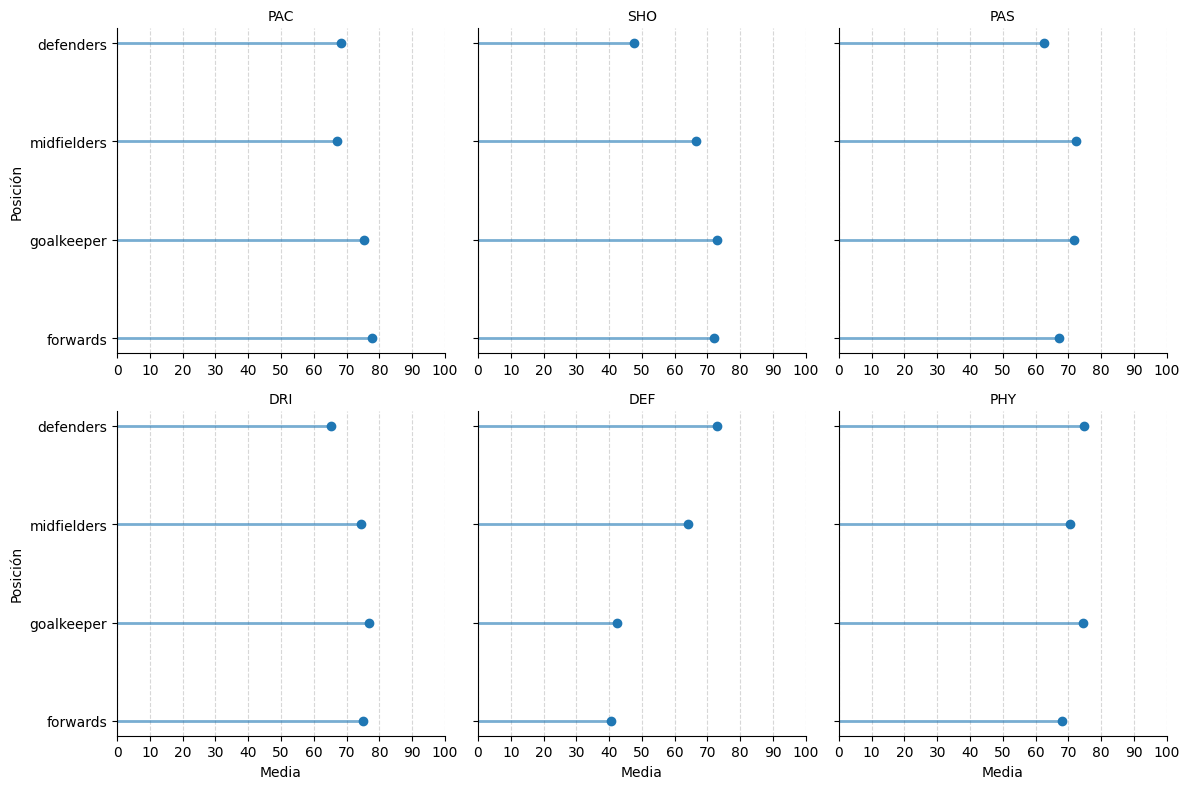

In [118]:
# 1. Pasar de ancho → largo
df_long = df_pos.melt(
    id_vars="Position_simple", 
    value_vars=["PAC","SHO","PAS","DRI","DEF","PHY"],
    var_name="Attribute", 
    value_name="Mean"
)

# 2. Crear FacetGrid con seaborn
g = sns.FacetGrid(
    df_long, 
    col="Attribute", 
    col_wrap=3,   # 3 columnas por fila
    sharex=False, 
    height=4
)

# 3. Agregar lollipop chart manual (línea + punto)
def lollipop(x, y, color, **kwargs):
    plt.hlines(y=y, xmin=0, xmax=x, color=color, alpha=0.6, linewidth=2)
    plt.plot(x, y, "o", color=color)

g.map(lollipop, "Mean", "Position_simple")


# 4. Ajustes estéticos
g.set_titles("{col_name}")
g.set_axis_labels("Media", "Posición")

for ax in g.axes.flatten():
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)
    # Fijar rango 0-100
    ax.set_xlim(0, 100)
    # Ticks cada 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()

Llama la atención que el valor de SHO de goalkeepers y de forwards es tan similar, mientras que uno esperaría que los forwards destaquen por su valor de SHO. 

Consideremos qué sub-atributos componen cada atributo:

| **Atributo general**                             | **Características específicas que lo componen**                                                          |
| ------------------------------------------------ | -------------------------------------------------------------------------------------------------------- |
| **PAC (Pace / Velocidad)**                       | `Acceleration`, `SprintSpeed`                                                                            |
| **DRI (Dribbling / Regate)**                     | `Agility`, `Balance`, `Reactions`, `Ball Control`, `Dribbling`, `Composure`                               |
| **DEF (Defending / Defensa)**                    | `Interceptions`, `Heading Accuracy`, `Standing Tackle`, `Sliding Tackle`                         |
| **SHO (Shooting / Tiro)**                        | `Positioning`, `Finishing`, `ShotPower`, `LongShots`, `Volleys`, `Penalties`                             |
| **PAS (Passing / Pase)**                         | `Vision`, `Crossing`, `Free Kick Accuracy`, `Short Passing`, `Long Passing`, `Curve`                         |
| **PHY (Physical / Físico)**                      | `Jumping`, `Stamina`, `Strength`, `Aggression`                                                           |

Y exploremos los sub-atributos que componen SHO. 

In [119]:
df_SHO = df_n.groupby('Position_simple').agg(
    SHO = ("SHO","mean"),
    Positioning = ("Positioning", "mean"),
    Finishing = ("Finishing", "mean"),
    ShotPower = ("Shot Power", "mean"),
    LongShots = ("Long Shots", "mean"),
    Volleys = ("Volleys", "mean"),
    Penalties = ("Penalties", "mean")
)

df_SHO.sort_values('SHO')



,SHO,Positioning,Finishing,ShotPower,LongShots,Volleys,Penalties
Position_simple,,,,,,,
defenders,47.546017,51.942769,42.673627,60.211910,46.632637,40.567672,46.364269
midfielders,66.619134,69.305054,64.365523,72.222924,68.661552,59.002708,60.883574
forwards,72.037252,74.290563,72.948675,74.784768,69.378311,66.399834,66.483444
goalkeeper,72.906005,11.532637,12.148825,53.877285,12.814621,12.584856,21.086162


El fenómeno se debe a que el dataset no calcula SHO como un simple promedio de los 6 sub-atributos de tiro, sino que realiza un promedio ponderado de distinta manera según la posición del jugador. 

En goalkeepers, el ShotPower tiene un peso mayor en el SHO global, y como ese atributo es relativamente alto, levanta el valor global.

Esto indica que para separar a los jugadores por posición, es conveniente utilizar directamente los sub-atributos, ya que representan de forma más fiel las características de cada jugador de forma independiente de la posición. 

## Selección de sub-atributos interesantes

In [120]:
# Diccionario que relaciona atributos generales con sus sub-atributos
atributos_dict = {
    "PAC": ["Acceleration", "Sprint Speed"],
    "DRI": ["Agility", "Balance", "Reactions", "Ball Control", "Dribbling", "Composure"],
    "DEF": ["Interceptions", "Heading Accuracy", "Def Awareness", "Standing Tackle", "Sliding Tackle"],
    "SHO": ["Positioning", "Finishing", "Shot Power", "Long Shots", "Volleys", "Penalties"],
    "PAS": ["Vision", "Crossing", "Free Kick Accuracy", "Short Passing", "Long Passing", "Curve"],
    "PHY": ["Jumping", "Stamina", "Strength", "Aggression"]
}


# Lista para acumular resultados
df_list = []

for atributo, sub_atributos in atributos_dict.items():
    columnas = [atributo] + sub_atributos
    df_media = df_n.groupby("Position_simple")[columnas].mean().reset_index()
    
    # Pasar de ancho → largo
    df_long = df_media.melt(
        id_vars="Position_simple",
        value_vars=columnas,
        var_name="Subatributo",
        value_name="Media"
    )
    
    # Agregar columna del atributo general
    df_long["Atributo_general"] = atributo
    
    df_list.append(df_long)

# Concatenar todo
df_all = pd.concat(df_list, ignore_index=True)

# Reordenar columnas para legibilidad
df_all = df_all[["Position_simple", "Atributo_general", "Subatributo", "Media"]]


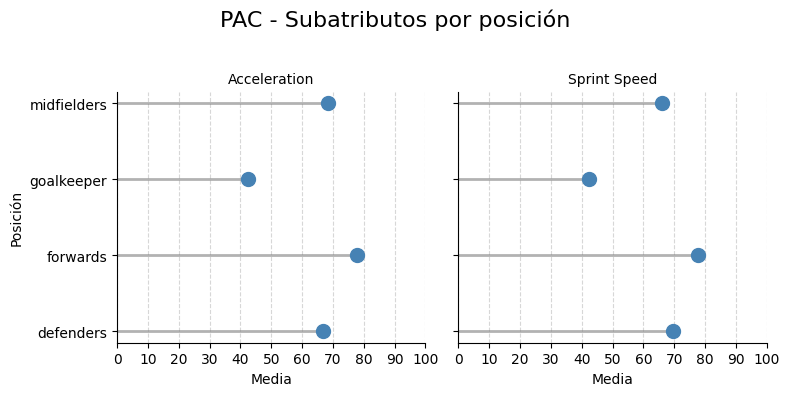

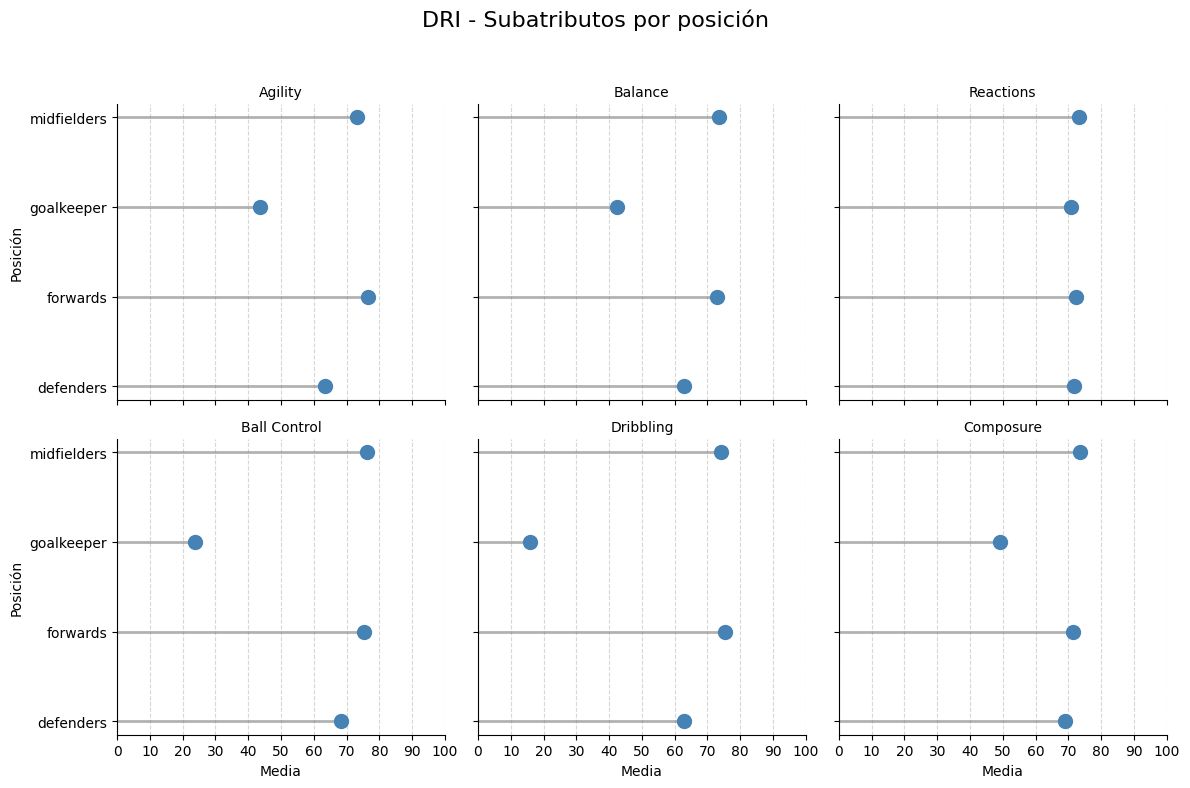

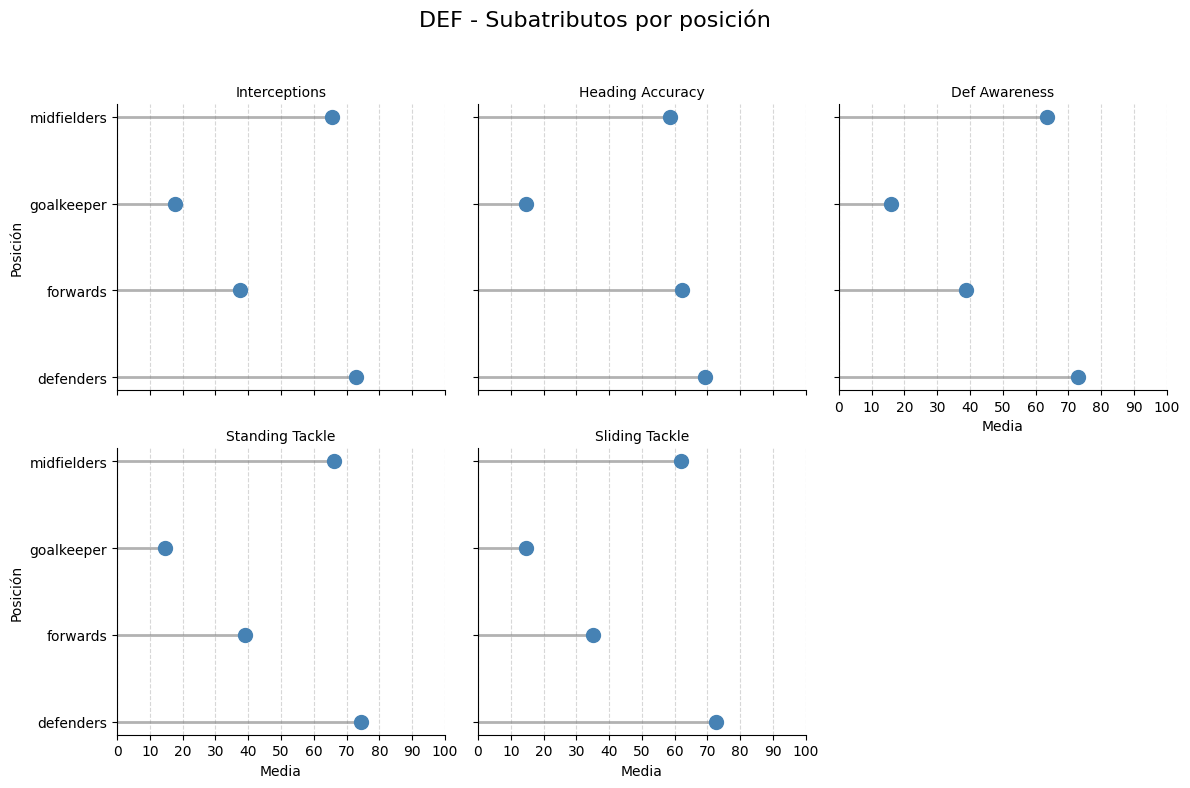

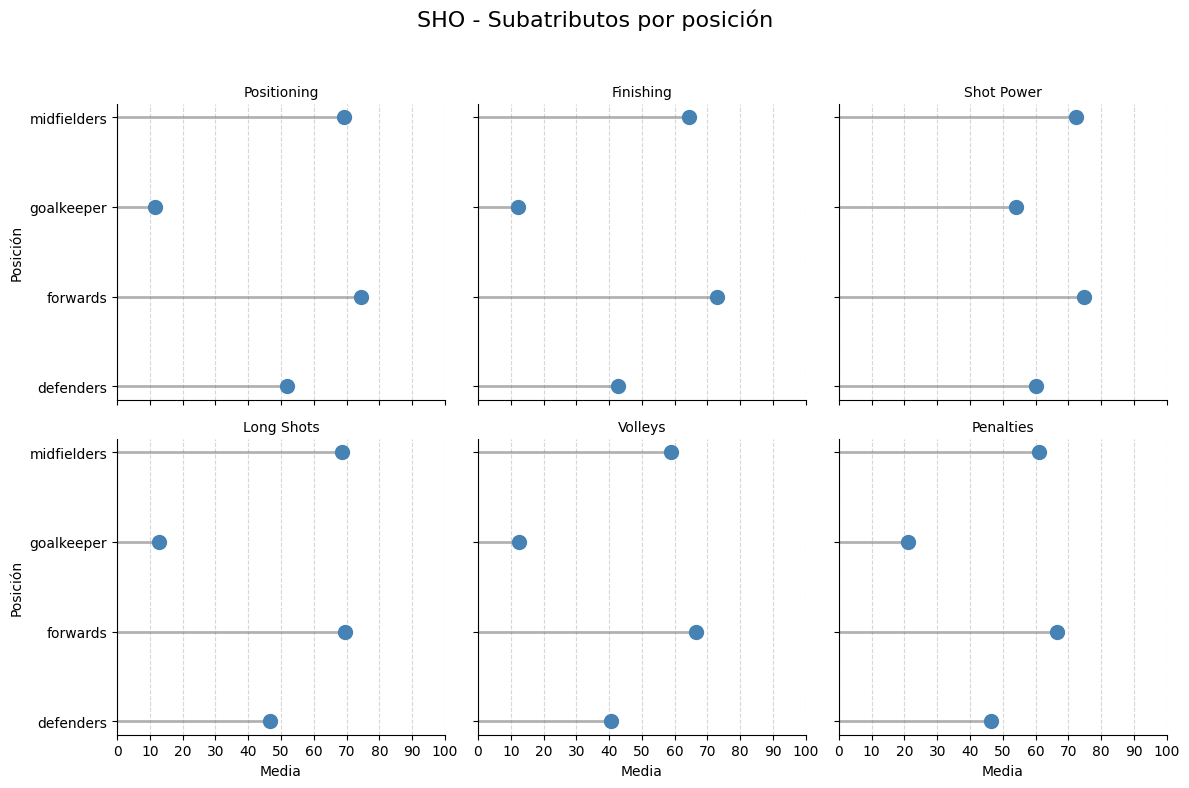

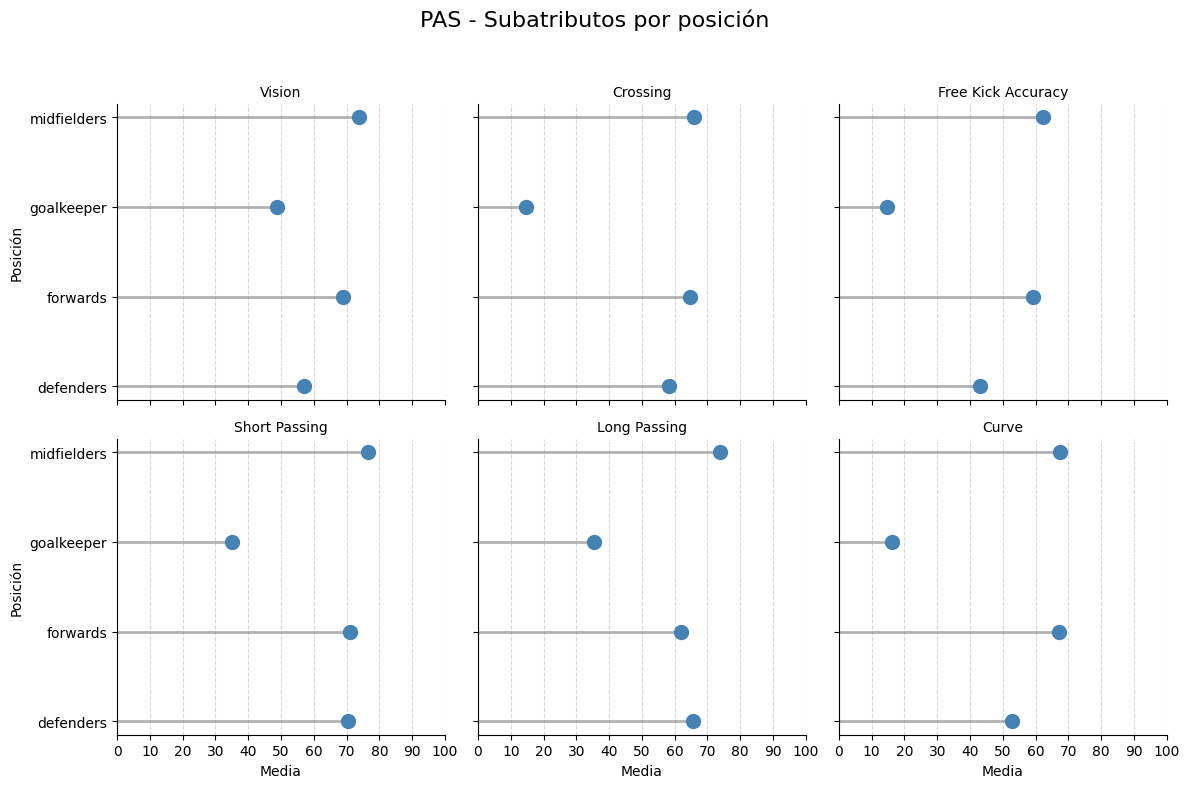

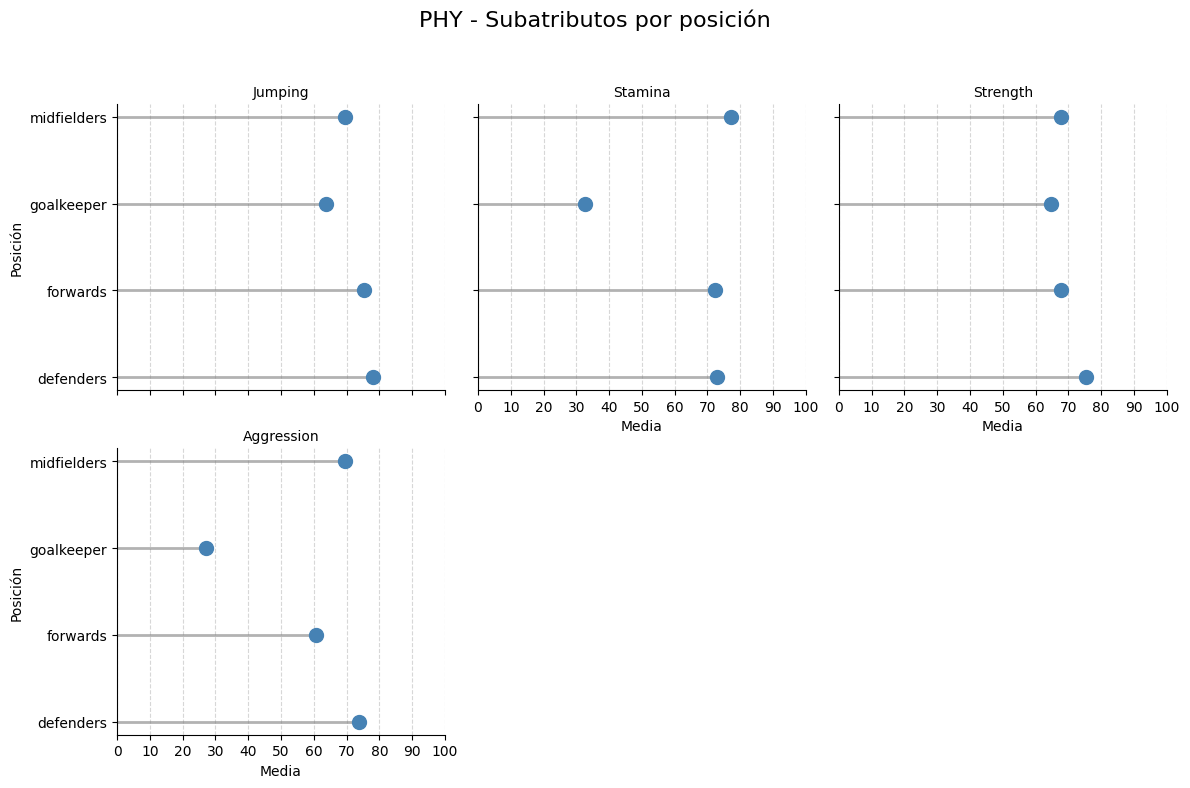

In [121]:
# Iteramos por cada atributo general
for atributo in df_all["Atributo_general"].unique():
    df_attr = df_all[df_all["Atributo_general"] == atributo]

    # Excluir el atributo general de los subatributos
    df_attr = df_attr[df_attr["Subatributo"] != atributo]

    subatributos = df_attr["Subatributo"].unique()
    n_sub = len(subatributos)
    
    if n_sub == 0:
        continue  # saltar si no hay subatributos

    # Definir grilla: máximo 3 columnas, filas calculadas
    n_cols = min(3, n_sub)
    n_rows = math.ceil(n_sub / n_cols)

    # Crear FacetGrid
    g = sns.FacetGrid(
        df_attr,
        col="Subatributo",
        col_wrap=n_cols,
        height=4,
        sharex=True,
        sharey=True
    )

    # Función lollipop horizontal
    def lollipop(x, y, **kwargs):
        ax = plt.gca()
        ax.hlines(y=y, xmin=0, xmax=x, color="gray", alpha=0.6, linewidth=2)
        ax.scatter(x, y, s=100, color="steelblue", zorder=3)

    g.map(lollipop, "Media", "Position_simple")

    # Ajustes estéticos
    g.set_titles("{col_name}")
    g.set_axis_labels("Media", "Posición")
    for ax in g.axes.flatten():
        ax.grid(True, axis="x", linestyle="--", alpha=0.5)
        ax.set_xlim(0, 100)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

    plt.suptitle(f"{atributo} - Subatributos por posición", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Nos proponemos seleccionar un conjunto de variables que nos permita diferenciar las distintas posiciones. 

Realizando un análisis visual de los gráficos, pre-seleccionamos las siguientes variables:
- `Ball Control` para diferenciar Goalkeepers del resto (esta es separación más sencilla)
- `Def Awareness` para diferenciar Defenders de Forwards

El grupo que presenta mayores desafíos es el de Midfielders, ya que a veces se comporta similar a Defenders y a veces similar a Forwards. Por eso, seleccionamos dos variables para diferenciarlos de los otros dos grupos:

- `Long Shots` para diferenciar Midfielders de Defenders
- `Sliding Tackle` para diferenciar Midfielders de Forwards

In [122]:
interesting_skills = ['Ball Control', 'Long Shots','Def Awareness', 'Sliding Tackle']

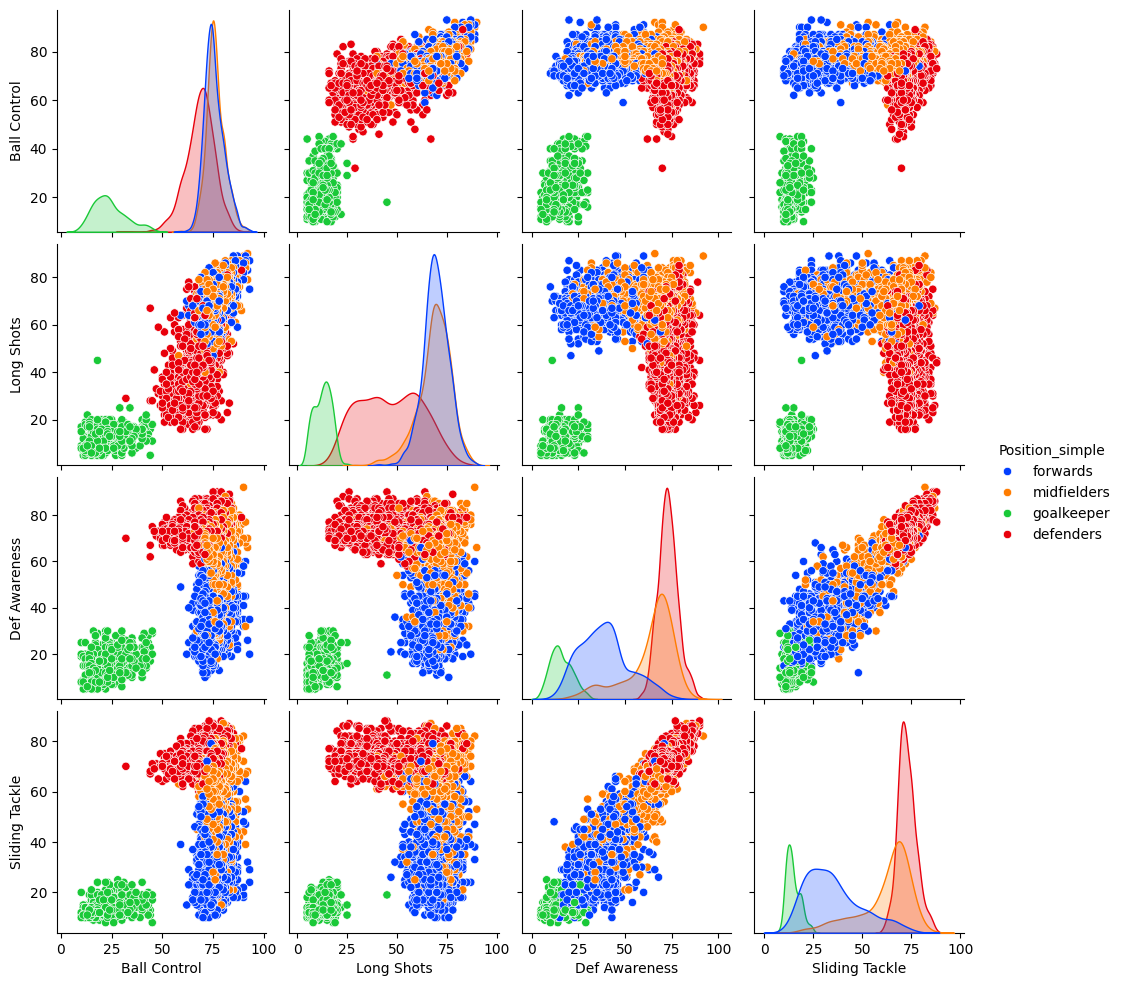

In [123]:
df_int = pd.concat([df_n[interesting_skills], df_n['Position_simple']], axis=1)
sns.pairplot(df_int, hue="Position_simple",palette='bright')

# K means con var seleccionadas

In [124]:
df_k_means = df_n[interesting_skills]

In [125]:
df_k_means

,Ball Control,Long Shots,Def Awareness,Sliding Tackle
0,92,83,26,32
1,90,89,92,82
2,83,83,38,29
3,89,86,77,77
4,90,83,32,18
...,...,...,...,...
3987,13,9,6,11
3988,56,19,69,72
3989,71,64,63,68
3990,34,17,23,16


In [126]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust,random_state=5)
km.fit(df_k_means) 

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  827640.6877517331


In [127]:
df_clusters=df_k_means.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')




Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


In [128]:
bool_crack=df_n["OVR"] > 85
bool_no_crack=df_n["OVR"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=interesting_skills[1]
skill_2=interesting_skills[2]

In [129]:
kmean_clusters = go.Scatter(x=df_k_means[skill_1], y=df_k_means[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_k_means.loc[bool_crack,skill_1], y=df_k_means.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",font=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [130]:
#En Colab:
fig.show()

In [131]:
from sklearn.preprocessing import StandardScaler

# Creamos df para clustering
X = df_n[interesting_skills]
X.index = df_n["Name"]  # opcional, para identificar los jugadores

# Escalar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [132]:

# Definir número de clusters (puedes probar distintos valores)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Guardar resultados
df_n["cluster_kmeans"] = clusters_kmeans

DBSCAN

In [133]:
from sklearn.cluster import DBSCAN

# Ajustamos eps y min_samples según el dataset
dbscan = DBSCAN(eps=3, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

df_n["cluster_dbscan"] = clusters_dbscan


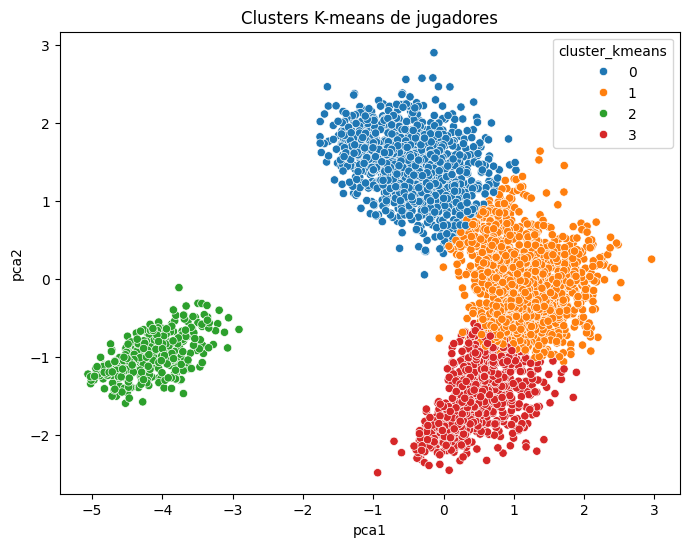

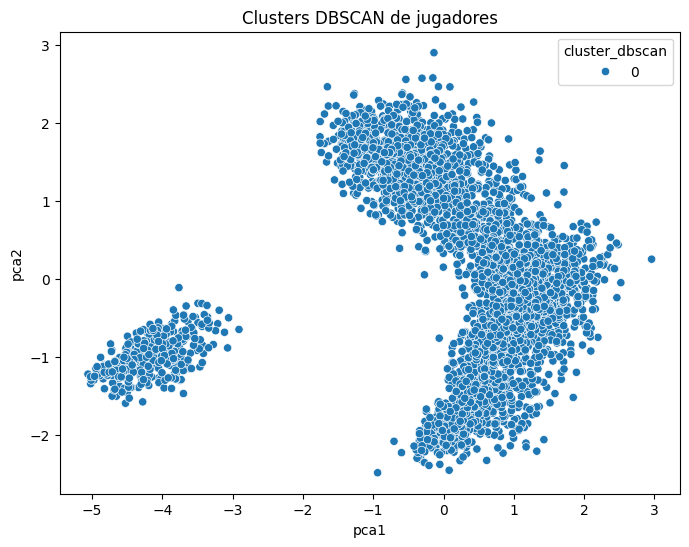

In [134]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_n["pca1"] = X_pca[:,0]
df_n["pca2"] = X_pca[:,1]

# Visualización K-means
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_n, x="pca1", y="pca2", hue="cluster_kmeans", palette="tab10")
plt.title("Clusters K-means de jugadores")
plt.show()

# Visualización DBSCAN
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_n, x="pca1", y="pca2", hue="cluster_dbscan", palette="tab10")
plt.title("Clusters DBSCAN de jugadores")
plt.show()


### Caracterizar cada cluster

In [135]:
# Media de atributos por cluster K-means
df_n.groupby("cluster_kmeans")[interesting_skills].mean()


,Ball Control,Long Shots,Def Awareness,Sliding Tackle
cluster_kmeans,,,,
0,75.534100,69.865242,35.679540,31.851274
1,75.054313,66.920128,68.605751,67.838978
2,23.819843,12.814621,15.770235,14.545692
3,65.923821,36.790810,73.494559,72.823458


cluster 0: forwards
cluster 1: 
cluster 2: goalkeeper
cluster 3:

In [136]:
# Ver distribución de posiciones por cluster
pd.crosstab(df_n["cluster_kmeans"], df_n["Position_simple"])

Position_simple,defenders,forwards,goalkeeper,midfielders
cluster_kmeans,,,,
0,0,1017,0,200
1,514,188,0,863
2,0,0,383,0
3,779,3,0,45


Cluster 0 rico en forwards y algunos midfielders. 

Cluster 1 mezcla de midfielders, defenders y forwards. 

Cluster 2 goalkeepers. 

Cluster 3 rico en defenders y muy pocos midfielders. 

In [137]:
# Ver distribución de posiciones por cluster
pd.crosstab(df_n["cluster_kmeans"], df_n["Position"])

Position,CAM,CB,CDM,CM,GK,LB,LM,LW,RB,RM,RW,ST
cluster_kmeans,,,,,,,,,,,,
0,182,0,0,18,0,0,181,82,0,160,72,522
1,101,144,308,454,0,187,71,16,183,75,16,10
2,0,0,0,0,383,0,0,0,0,0,0,0
3,0,606,45,0,0,66,2,0,107,1,0,0


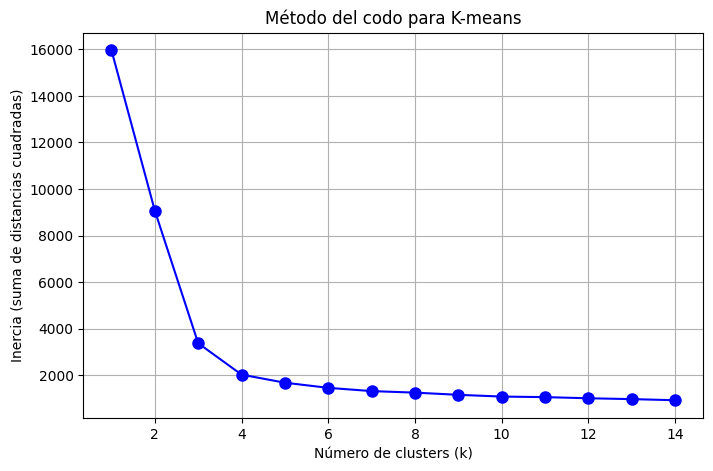

In [138]:
# Método del codo
inertia = []
K = range(1, 15)  # probamos de 1 a 14 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (suma de distancias cuadradas)")
plt.title("Método del codo para K-means")
plt.grid(True)
plt.show()

### K means con casi todas las skills

Excluyo las features de PHY, así como Reactions y Composure, ya que no tienen valor de diferenciación. 

In [139]:

# Creamos df para clustering

skills = ["Acceleration", "Sprint Speed",
    "Agility", "Balance", "Ball Control", "Dribbling", "Composure",
    "Interceptions", "Heading Accuracy", "Def Awareness", "Standing Tackle", "Sliding Tackle",
    "Positioning", "Finishing", "Shot Power", "Long Shots", "Volleys", "Penalties",
    "Vision", "Crossing", "Free Kick Accuracy", "Short Passing", "Long Passing", "Curve"
    ]
X_all = df_n[skills]
X.index = df_n["Name"]  # opcional, para identificar los jugadores

# Escalar features
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)


In [140]:

# Definir número de clusters 
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_all_scaled)

# Guardar resultados
df_n["cluster_kmeans_2"] = clusters_kmeans

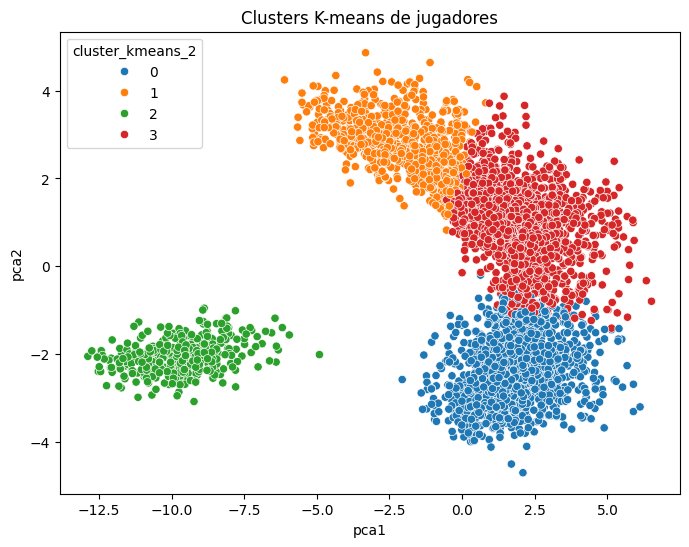

In [141]:
# Reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_scaled)

df_n["pca1"] = X_pca[:,0]
df_n["pca2"] = X_pca[:,1]

# Visualización K-means
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_n, x="pca1", y="pca2", hue="cluster_kmeans_2", palette="tab10")
plt.title("Clusters K-means de jugadores")
plt.show()

In [142]:
# Media de atributos por cluster K-means
df_n.groupby("cluster_kmeans_2")[skills].mean()

,Acceleration,Sprint Speed,Agility,Balance,Ball Control,Dribbling,Composure,Interceptions,Heading Accuracy,Def Awareness,Standing Tackle,Sliding Tackle,Positioning,Finishing,Shot Power,Long Shots,Volleys,Penalties,Vision,Crossing,Free Kick Accuracy,Short Passing,Long Passing,Curve
cluster_kmeans_2,,,,,,,,,,,,,,,,,,,,,,,,
0,77.580460,77.026273,76.981117,73.513957,75.497537,75.525452,71.417898,34.371100,61.292282,35.954023,35.926108,31.951560,74.344007,73.401478,74.870279,69.862069,66.973727,67.176519,69.142857,64.106732,60.087849,71.082923,62.060755,67.256158
1,60.692695,64.957179,57.066751,56.678841,65.246851,57.085642,67.513854,73.384131,72.022670,73.817380,74.953401,72.822418,42.457179,35.250630,54.562972,38.021411,33.908060,42.590680,50.842569,48.468514,35.094458,68.765743,63.513854,43.001259
2,42.524804,42.381201,43.728460,42.509138,23.819843,15.825065,49.237598,17.668407,14.749347,15.770235,14.663185,14.545692,11.532637,12.148825,53.877285,12.814621,12.584856,21.086162,48.704961,14.639687,14.657963,35.065274,35.422977,16.193211
3,71.153413,69.864746,72.938009,72.775204,75.229806,73.430182,72.703193,70.262993,60.986224,68.357545,71.118347,67.888541,68.524108,60.879148,71.197245,65.686287,56.069505,57.659361,71.314339,68.814026,59.595492,75.510958,72.069505,67.710708


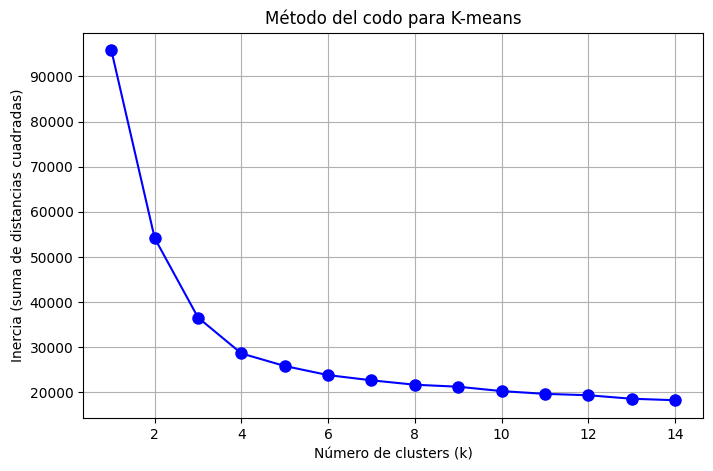

In [143]:
# Método del codo
inertia = []
K = range(1, 15)  # probamos de 1 a 14 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_all_scaled)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (suma de distancias cuadradas)")
plt.title("Método del codo para K-means")
plt.grid(True)
plt.show()

In [145]:
# Ver distribución de posiciones por cluster
pd.crosstab(df_n["cluster_kmeans_2"], df_n["Position_simple"])


Position_simple,defenders,forwards,goalkeeper,midfielders
cluster_kmeans_2,,,,
0,0,1052,0,166
1,751,0,0,43
2,0,0,383,0
3,542,156,0,899


Cluster 0 rico en forwards y algunos midfielders. 

Cluster 1 rico en defenders y muy pocos midfielders. 

Cluster 2 goalkeepers. 

Cluster 3 mezcla de midfielders, defenders y forwards.


In [144]:
# Ver distribución de posiciones por cluster
pd.crosstab(df_n["cluster_kmeans_2"], df_n["Position"])


Position,CAM,CB,CDM,CM,GK,LB,LM,LW,RB,RM,RW,ST
cluster_kmeans_2,,,,,,,,,,,,
0,159,0,0,7,0,0,187,87,0,170,82,526
1,0,641,43,0,0,39,0,0,71,0,0,0
2,0,0,0,0,383,0,0,0,0,0,0,0
3,124,109,310,465,0,214,67,11,219,66,6,6


## CLustering jerarquico

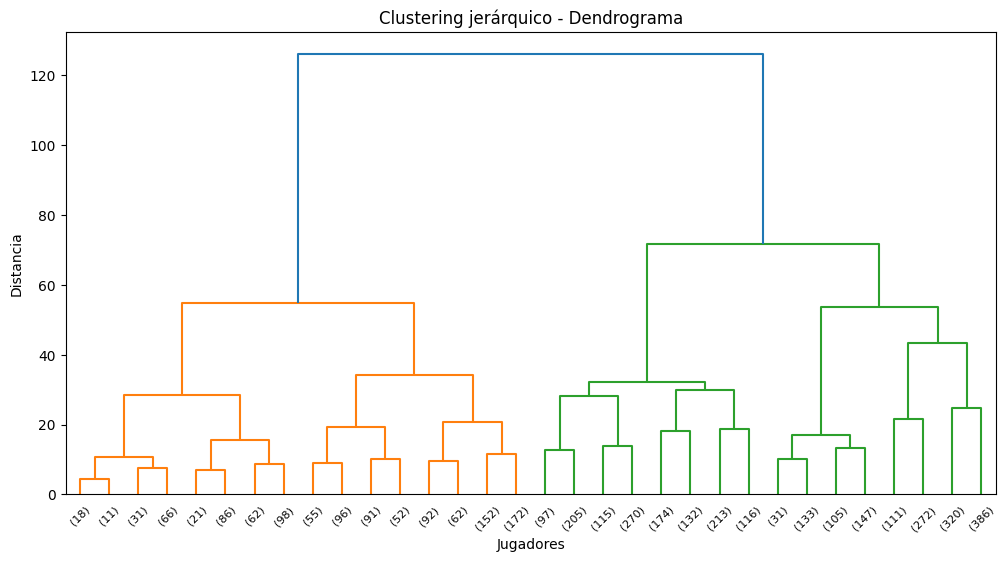

Cluster_hierarchical
3    1322
5    1089
2     772
4     416
1     393
Name: count, dtype: int64


In [146]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Seleccionar features (ejemplo: atributos generales)
features = ["PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]
X = df_n[features].fillna(0)

# Escalar datos (muy recomendable)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering jerárquico (linkage)
Z = linkage(X_scaled, method='ward')  # ward minimiza varianza intra-cluster

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=4)  # p = nivel de profundidad
plt.title("Clustering jerárquico - Dendrograma")
plt.xlabel("Jugadores")
plt.ylabel("Distancia")
plt.show()

# Cortar el dendrograma para formar clusters (ej: 5 clusters)
clusters = fcluster(Z, t=5, criterion="maxclust")

# Agregar al dataframe
df_n["Cluster_hierarchical"] = clusters

# Ver distribución
print(df_n["Cluster_hierarchical"].value_counts())

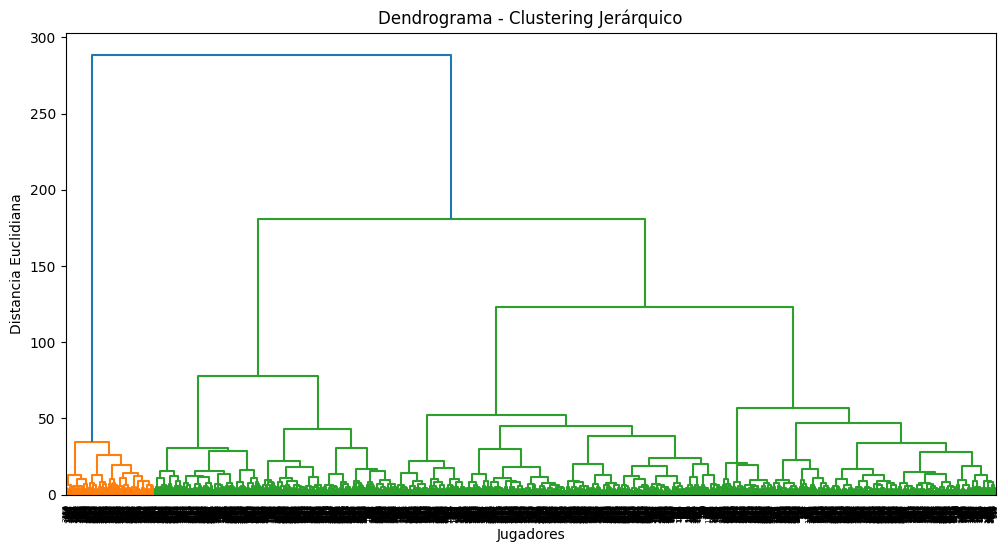

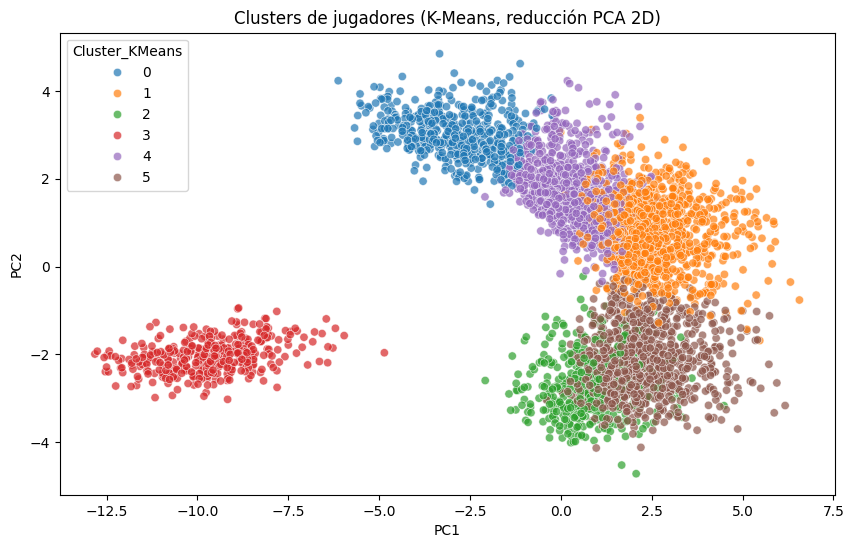

In [147]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
# ========= 1. Selección de variables =========
# Lista de atributos técnicos y físicos (ajustar según tu df)

# Dataset base
df_model = df_n[skills + ['Preferred foot', 'Position', 'Position_simple']].copy()

# ========= 2. One-hot encoding =========
df_model = pd.get_dummies(df_model, columns=['Preferred foot'], drop_first=True)

# ========= 3. Escalado =========
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model.drop(columns=['Position', 'Position_simple']))

# ========= 4. K-Means =========
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_model['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# ========= 5. Clustering jerárquico =========
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
df_model['Cluster_HC'] = hc.fit_predict(X_scaled)

# ========= 6. Dendrograma (para jerárquico) =========
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Jugadores")
plt.ylabel("Distancia Euclidiana")
plt.show()



# ========= 8. Visualización 2D (PCA opcional para ver clusters) =========
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_model['PC1'] = X_pca[:,0]
df_model['PC2'] = X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_model, x='PC1', y='PC2', 
    hue='Cluster_KMeans', palette='tab10', alpha=0.7
)
plt.title("Clusters de jugadores (K-Means, reducción PCA 2D)")
plt.show()


In [148]:
# ========= 7. Análisis de clusters =========
print("\n--- Distribución de posiciones por cluster (K-Means) ---")
pd.crosstab(df_model['Cluster_KMeans'], df_model['Position'])



--- Distribución de posiciones por cluster (K-Means) ---


Position,CAM,CB,CDM,CM,GK,LB,LM,LW,RB,RM,RW,ST
Cluster_KMeans,,,,,,,,,,,,
0,0,511,10,0,0,5,0,0,7,0,0,0
1,101,30,178,412,0,94,41,6,55,28,3,7
2,9,0,0,0,0,0,12,7,0,11,2,403
3,0,0,0,0,383,0,0,0,0,0,0,0
4,4,209,165,50,0,154,12,0,228,24,0,0
5,169,0,0,10,0,0,189,85,0,173,83,122


In [149]:

print("\n--- Distribución de posiciones por cluster (Jerárquico) ---")
pd.crosstab(df_model['Cluster_HC'], df_model['Position'])


--- Distribución de posiciones por cluster (Jerárquico) ---


Position,CAM,CB,CDM,CM,GK,LB,LM,LW,RB,RM,RW,ST
Cluster_HC,,,,,,,,,,,,
0,128,71,284,443,0,120,69,17,167,75,14,8
1,150,0,0,8,0,0,175,81,0,157,73,315
2,3,231,64,21,0,127,10,0,121,4,0,0
3,0,0,0,0,383,0,0,0,0,0,0,0
4,0,448,5,0,0,6,0,0,2,0,0,0
5,2,0,0,0,0,0,0,0,0,0,1,209


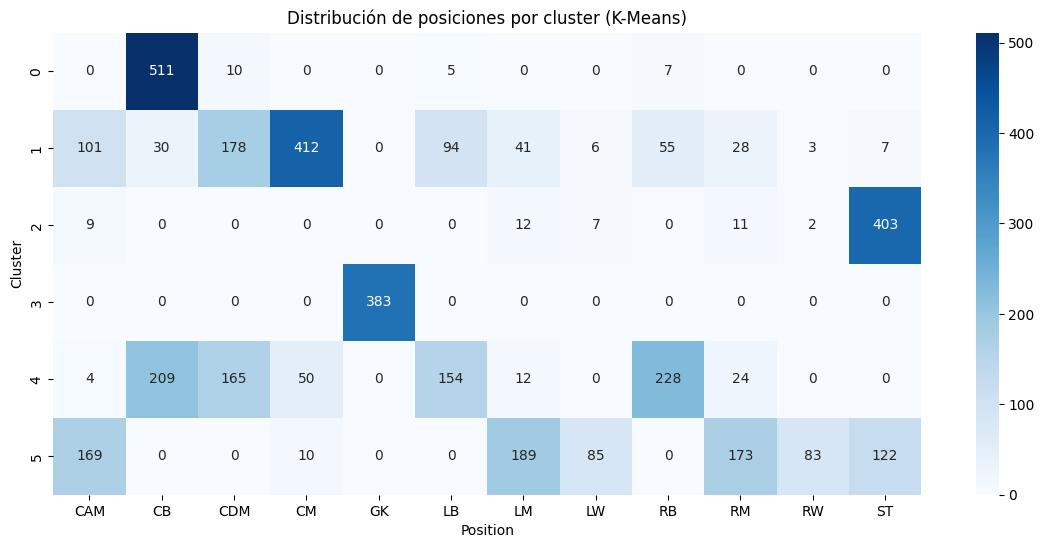

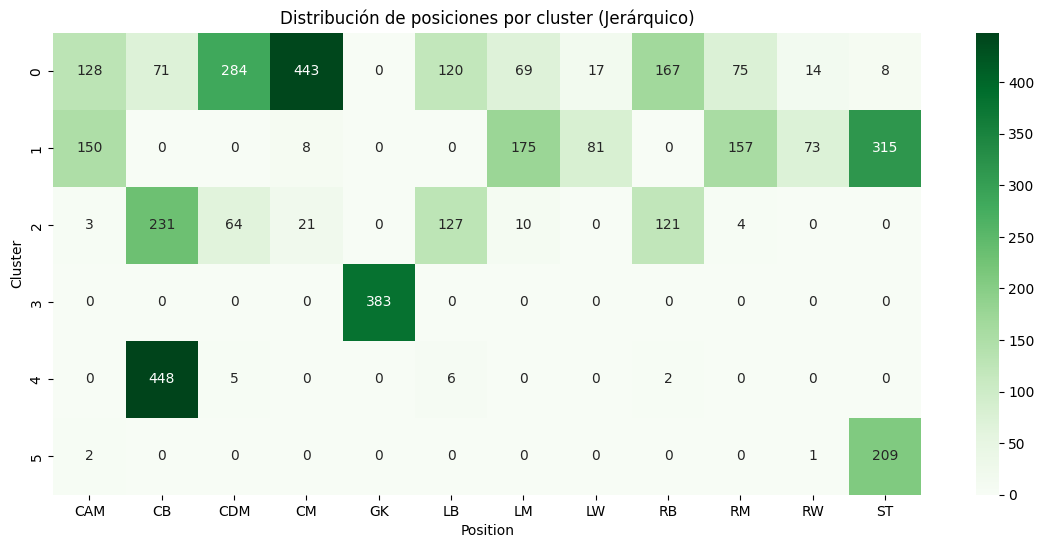

In [150]:
# --- Heatmap K-Means ---
ct_kmeans = pd.crosstab(df_model['Cluster_KMeans'], df_model['Position'])

plt.figure(figsize=(14,6))
sns.heatmap(ct_kmeans, annot=True, fmt="d", cmap="Blues")
plt.title("Distribución de posiciones por cluster (K-Means)")
plt.ylabel("Cluster")
plt.xlabel("Position")
plt.show()

# --- Heatmap Clustering Jerárquico ---
ct_hc = pd.crosstab(df_model['Cluster_HC'], df_model['Position'])

plt.figure(figsize=(14,6))
sns.heatmap(ct_hc, annot=True, fmt="d", cmap="Greens")
plt.title("Distribución de posiciones por cluster (Jerárquico)")
plt.ylabel("Cluster")
plt.xlabel("Position")
plt.show()
